### Imports of library

In [8]:
import cv2
import numpy as np
import time
import os 
import itertools
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as  plt
import pickle as pkl
from IPython.display import clear_output as clr
import time
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import train_test_split as tts
from scipy import stats
from xgboost import XGBClassifier as XGC
from sklearn.ensemble import RandomForestClassifier as RFC

In [9]:
def describeSURF(image):
    surf = cv2.xfeatures2d.SURF_create()
    surf.setHessianThreshold(400)
    kp, des = surf.detectAndCompute(image,None)
    return kp,des

def describeSIFT(image):
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(image,None)
    return kp,des

def describeORB(image):
    orb=cv2.ORB_create()
    kp, des=orb.detectAndCompute(image,None)
    return kp,des

In [10]:
def getDescriptors(images,function):
    
    descriptors = []
    
    for im in images:
        
        kp,des = function(im)
        
        if des is not None:
            descriptors.append(des)
            
    descriptors = list(itertools.chain.from_iterable(descriptors))
    descriptors = np.asarray(descriptors)

    return descriptors

In [11]:
def get_kMeansModel(X, k):
    model = GMM(n_clusters=k,init='kmeans',tol=0.0001,verbose=1).fit(X)
    return model

In [12]:
def get_VLAD(X,model):

    c_vals = model.predict(X)
    centers = model.cluster_centers_
    labels = model.labels_
    k = model.n_clusters
   
    m,d = X.shape
    V=np.zeros([k,d])
    
    for i in range(k):
        if np.sum(c_vals==i)>0:
            V[i]=np.sum(X[c_vals == i,:]-centers[i],axis=0)
            

    V = V.flatten()
    
    V = np.sign(V)*np.sqrt(np.abs(V))

    # L2 normalization
    V = V/np.sqrt(np.dot(V,V))
    
    
    vec = np.zeros(k)
    cv = np.unique(c_vals, return_counts =True)
    vec[cv[0]] = cv[1]
    
    vec = vec/np.sqrt(np.dot(vec,vec))
    vlad_vec = np.concatenate((V, vec))
    
    return vlad_vec

In [13]:
def getVLAD_Descriptors(images,function,k_model):
    descriptors = []

    
    
    for im in images:
        
        dess = []
        kp,des = function(im)
        if des is not None:
            dess.append(des)
        
        dess = list(itertools.chain.from_iterable(dess))
        dess = np.asarray(dess)
        
        description = get_VLAD(dess,k_model)
        
        descriptors.append(description)
    
    return descriptors

In [14]:
images = np.load("images.npy")
broad_label = np.load("broad_labels.npy")

### SIFT Based Features

In [15]:
load_model  = False
if(load_model):
    X = np.load("X_SIFT.npy")
    with open("k_model_sift.pkl", "rb") as file:
        k_model_sift = pkl.load(file) 
else:
    X = getDescriptors(images, describeSIFT)
    k_model_sift = get_kMeansModel(X, 24)
    np.save("X_SIFT.npy", X)
    with open("k_model_sift.pkl", "wb") as file:
        pkl.dump(k_model_sift, file)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/abhikcr/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-0e8669c5fd83>", line 7, in <module>
    X = getDescriptors(images, describeSIFT)
  File "<ipython-input-10-295b2ce949d7>", line 7, in getDescriptors
    kp,des = function(im)
  File "<ipython-input-9-d0a103166b24>", line 9, in describeSIFT
    kp, des = sift.detectAndCompute(image,None)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/abhikcr/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/h

KeyboardInterrupt: 

In [ ]:
load_desc = load_model
if(not load_desc):
    desc = getVLAD_Descriptors(images, describeSIFT, k_model_sift)
    np.save("desc_sift.npy",desc)
else:
    desc = np.load("desc_sift.npy")

### SURF Based Features

In [ ]:
load_model  = False
if(load_model):
    X = np.load("X_SURF.npy")
    with open("k_model_surf.pkl", "rb") as file:
        k_model_surf = pkl.load(file) 
else:
    X = getDescriptors(images, describeSURF)
    k_model_surf = get_kMeansModel(X, 24)
    np.save("X_SURF.npy", X)
    with open("k_model_surf.pkl", "wb") as file:
        pkl.dump(k_model_surf, file)

In [ ]:
load_desc = load_model
if(not load_desc):
    desc = getVLAD_Descriptors(images, describeSURF, k_model_surf)
    np.save("desc_surf.npy",desc)
else:
    desc = np.load("desc_surf.npy")

### ORB Based Features

In [ ]:
load_model  = False
if(load_model):
    X = np.load("X_ORB.npy")
    with open("k_model_orb.pkl", "rb") as file:
        k_model_orb = pkl.load(file) 
else:
    X = getDescriptors(images, describeORB)
    k_model_orb = get_kMeansModel(X, 24)
    np.save("X_ORB.npy", X)
    with open("k_model_orb.pkl", "wb") as file:
        pkl.dump(k_model_orb, file)

In [ ]:
load_desc = load_model
if(not load_desc):
    desc = getVLAD_Descriptors(images, describeORB, k_model_orb)
    np.save("desc_orb.npy",desc)
else:
    desc = np.load("desc_orb.npy")

### Combining all : Concatenated Classification

In [8]:
desc_sift = np.load("desc_sift.npy")

In [9]:
desc_surf = np.load("desc_surf.npy")

In [10]:
desc_orb= np.load("desc_orb.npy")

In [11]:
with open("k_model_sift.pkl", "rb") as file:
    k_model_sift = pkl.load(file) 
with open("k_model_surf.pkl", "rb") as file:
    k_model_surf = pkl.load(file) 
with open("k_model_orb.pkl", "rb") as file:
    k_model_orb = pkl.load(file) 

In [26]:
desc_net = np.concatenate((desc_sift, desc_surf, desc_orb), axis = 1)

In [28]:
X_train_c, X_test_c, y_train_c, y_test_c = tts(desc_net, broad_label, test_size=0.25,stratify = broad_label, random_state=42)

In [48]:
c_model_c = MLP(hidden_layer_sizes =(1000), validation_fraction = 0.33, early_stopping = True)

In [49]:
c_model_c.fit(X_train_c, y_train_c)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=1000, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.33, verbose=False, warm_start=False)

In [50]:
c_model_c.score(X_test_c, y_test_c)

0.8778877887788779

In [51]:
def solve_query(img):
    img = cv2.resize(img, (300,300))
    w,h,c = img.shape
    q_desc_sift = getVLAD_Descriptors(img.reshape(1,w,h,c), describeSIFT, k_model_sift)
    q_desc_surf = getVLAD_Descriptors(img.reshape(1,w,h,c), describeSURF, k_model_surf)
    q_desc_orb = getVLAD_Descriptors(img.reshape(1,w,h,c), describeORB, k_model_orb)
    
    q_desc_net = np.concatenate((q_desc_sift,q_desc_surf,q_desc_orb), axis = 1)
    idx = c_model_c.predict(q_desc_net)
    classes = ['airplane', 'birds', 'cars', 'dogs', 'flowers']
    print("This is in class : ", classes[idx[0]])

This is in class :  dogs


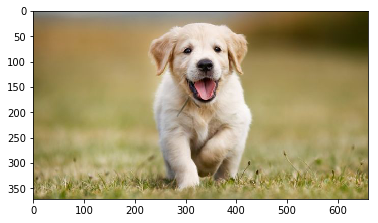

In [55]:
img = cv2.imread("sample_test/02.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
solve_query(img)